# Ensamble Technique Assignment 4

In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
x = df.drop('target', axis=1)
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [7]:
numerical_cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
category_cols = []

In [8]:
numaric_pipeline = Pipeline(
     steps=[
         ('imputer',SimpleImputer(strategy='median')),
         ('scaling',StandardScaler())
     ]
)

category_pipeline = Pipeline(
        steps = [
         ('imputer',SimpleImputer(strategy='most_frequent')),
         ('onehotencoder',OneHotEncoder())
        ]
)

In [9]:
preprocesser = ColumnTransformer([
         ('numaric_pipeline',numaric_pipeline,numerical_cols),
         ('category_pipeline',category_pipeline,category_cols)
])

In [10]:
X_train = preprocesser.fit_transform(x_train)
X_test = preprocesser.transform(x_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [12]:
models = {
      'Random Forest': RandomForestClassifier(),
      'Logistic Regression':LogisticRegression(),
      'Decision Tree': DecisionTreeClassifier(),
}

In [13]:
def evatute_cols(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        
        model.fit(X_train,y_train)
        
        
        y_pred = model.predict(X_test)
        
        test_model_conf_matrix = confusion_matrix(y_pred,y_test)
        test_model_clf_report = classification_report(y_pred,y_test)
        test_model_score = accuracy_score(y_pred,y_test)
        
        report[list(models.keys())[i]] = test_model_conf_matrix
        report[list(models.keys())[i]] = test_model_clf_report
        report[list(models.keys())[i]] = test_model_score
        
        
    return report
  

In [14]:
evatute_cols(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.8131868131868132,
 'Logistic Regression': 0.8131868131868132,
 'Decision Tree': 0.7362637362637363}

In [15]:
classifier = RandomForestClassifier()

In [16]:
parameters = {
       'max_depth':[10],
              'n_estimators':[100],
               'criterion':['gini','entropy']
              }

In [17]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [18]:
clf = RandomizedSearchCV(classifier,param_distributions=parameters,cv=5,scoring='accuracy',verbose=3)

In [19]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.860 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.814 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.738 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.762 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.814 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.762 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.905 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.762 total time=   

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10],
                                        'n_estimators': [100]},
                   scoring='accuracy', verbose=3)

In [20]:
clf.best_params_

{'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'}

In [21]:
best_model = clf.best_estimator_
best_model

RandomForestClassifier(criterion='entropy', max_depth=10)

In [22]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=10,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
conf_matrix = confusion_matrix(y_pred,y_test)
clf_report = classification_report(y_pred,y_test)
score = accuracy_score(y_pred,y_test)
print(conf_matrix)
print(clf_report)
print(score)

[[33  9]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.82      0.84      0.83        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

0.8131868131868132


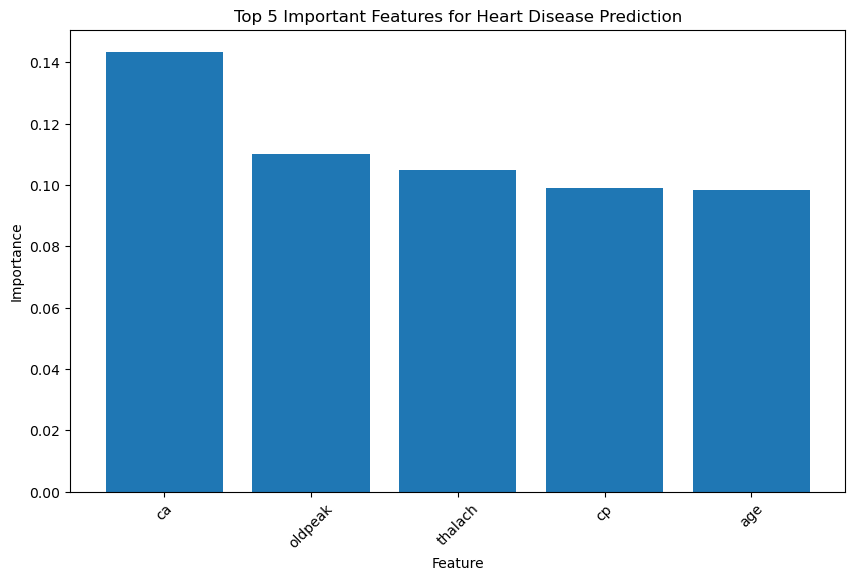

In [25]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = classifier.feature_importances_

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Top 5 important features
top_5_features = importance_df.head(5)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_5_features['Feature'], top_5_features['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Important Features for Heart Disease Prediction')
plt.xticks(rotation=45)
plt.show()
